# Mini Project 1, team Kool Kids

# 1. Dataset Preparation & Analysis

### 1.1 Load Dataset

In [3]:
import gzip
import json
import pandas as pd

labels = 'Post', 'Emotion', 'Sentiment'
file = gzip.open('goemotions.json.gz', 'rb')
entries = json.load(file)
dataset = pd.DataFrame(entries, columns=labels)

### 1.3 Extract posts and labels in a plot

##### data extraction

In [4]:
posts = dataset[labels[0]]
emotions = dataset[labels[1]]
sentiments = dataset[labels[2]]
emotions_distribution = dataset.pivot_table(columns=labels[1], aggfunc='size')
sentiments_distribution = dataset.pivot_table(columns=labels[2], aggfunc='size')


##### plotting the distributions

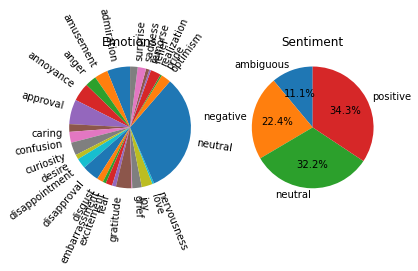

In [5]:
import matplotlib.pyplot as plt

fig, (emo, sent) = plt.subplots(1, 2)

# Emotions Pie Chart
emo.set_title("Emotions")
emo.pie(emotions_distribution.values, labels=emotions_distribution.keys(),
            shadow=False, startangle=90, rotatelabels=True)

# Sentiment Pie Chart
sent.set_title("Sentiment")
sent.pie(
    sentiments_distribution.values, labels=sentiments_distribution.keys(), 
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.show()

# 2. Words as Features

### 2.1 Displaying dataset tokens

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

post_vectorizer = CountVectorizer()
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

emotions_label_encoder = LabelEncoder()
Y = emotions_label_encoder.fit_transform(emotions)

sentiments_label_encoder = LabelEncoder()
Z = sentiments_label_encoder.fit_transform(sentiments)

There are 30449 unique tokens


### 2.2 Splitting the dataset

In [7]:
from sklearn.model_selection.tests import test_split

post_train, post_test, emotion_train, emotion_test, sentiment_train, sentiment_test = test_split.train_test_split(
    X,
    Y,
    Z,
    test_size=0.20)

### 2.3 Classifier Training / Testing

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#### 2.3.1 Base-MNB

In [9]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

MultinomialNB()

#### 2.3.2 Base-DT

#### 2.3.3 Base-MLP

In [10]:
base_mlp_emotion = MLPClassifier(max_iter=1)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=1)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=1)
MLPClassifier(max_iter=1)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


#### 2.3.4 Top-MNB

In [11]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_test, emotion_test)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_test, sentiment_test)


C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.25, 0.5, 0.75]})

#### 2.3.5 Top-DT

#### 2.3.6 Top-MLP

In [ ]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

### 2.4 Performance

#### Classification report

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

Base MNB
Emotion
Confusion Matrix 

[[ 921   10    4   11   46    3    2    5    0    1    7    0    0    3
     0   40    0   17   42    0  994    8    0    2    0    0    3    8]
 [  55  348    3   14   10    0    1    1    1    1    6    0    0    3
     0    5    0   20    5    0  775    1    0    1    0    0    0    6]
 [  11   12  120   88   12    1    3    3    0    4   13    8    0    3
     1    4    0    1    4    0  779    3    0    2    0    1    0    2]
 [  28   18   31  109   35    7    6    5    0    9   31    7    0    4
     3    9    0    1    4    0 1291    6    0    4    0    0    7    4]
 [ 108   25    2   25  217    7   10    7    2    2   27    2    0    1
     1   17    0    8   10    0 1728   13    0    7    0    1    5    2]
 [  10    0    1    2   14   37    2    3    0    1    4    0    0    0
     0   22    0    2    2    0  586   14    0    1    0    1    4    0]
 [  15    0    2   12   20    0   44   30    0    3   15    0    0    1
     0    2    0    0 

C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laure\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'base_mlp_emotion' is not defined

### 2.5 Exploration (Removing Stop Words)

In [ ]:
post_vectorizer = CountVectorizer(stop_words='english')
X = post_vectorizer.fit_transform(dataset[labels[0]])
print('There are', X.shape[1], 'unique tokens')

#### 2.5.1 Base-MNB

In [ ]:
base_mnb_emotion = MultinomialNB()
base_mnb_emotion.fit(post_train, emotion_train)

base_mnb_sentiment = MultinomialNB()
base_mnb_sentiment.fit(post_train, sentiment_train)

#### 2.5.2 Base-DT

#### 2.5.3 Base-MLP

In [ ]:
base_mlp_emotion = MLPClassifier(max_iter=1)
print(base_mlp_emotion.fit(post_train, emotion_train))


base_mlp_sentiment = MLPClassifier(max_iter=1)
print(base_mlp_sentiment.fit(post_train, sentiment_train))


#### 2.5.4 Top-MNB

In [ ]:
param_grid = {'alpha': [0, 0.25, 0.5, 0.75]}
top_mnb_emotion = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_emotion.fit(post_test, emotion_test)

top_mnb_sentiment = GridSearchCV(MultinomialNB(), param_grid)
top_mnb_sentiment.fit(post_test, sentiment_test)


#### 2.5.5 Top-DT

#### 2.5.6 Top-MLP

In [ ]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu', 'identity'],
    'hidden_layer_sizes': [(30,50),(10,10,10)],
    'solver': ['adam', 'sgd']
}

top_mlp_emotion = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_emotion.fit(post_train, emotion_train)


top_mlp_sentiment = GridSearchCV(MLPClassifier(max_iter=1), param_grid)
top_mlp_sentiment.fit(post_train, sentiment_train)

#### Classification report

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print('Base MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Base MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, base_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, base_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, base_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, base_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MNB')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mnb_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mnb_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment')
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mnb_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mnb_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

print('Top MLP')
print('Emotion')
print('Confusion Matrix \n')
print(confusion_matrix(emotion_test, top_mlp_emotion.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(emotion_test, top_mlp_emotion.predict(post_test), target_names=emotions_label_encoder.classes_))

print('Sentiment',)
print('Confusion Matrix \n')
print(confusion_matrix(sentiment_test, top_mlp_sentiment.predict(post_test)))
print('\n Classification Report \n')
print(classification_report(sentiment_test, top_mlp_sentiment.predict(post_test), target_names=sentiments_label_encoder.classes_))

## 3 Embedding as Features

### 3.1 Word2Vec import

In [10]:
from gensim.downloader import load


model = load('word2vec-google-news-300')

### 3.2 Tokenizer

In [12]:
from nltk.tokenize import word_tokenize

postsVec = dataset[labels[0]].apply(word_tokenize)
posts_vec_train, posts_vec_test = test_split.train_test_split(postsVec, test_size=0.20)

words_train = 0

for i, post in enumerate(posts_vec_train):
    for word in post:
        words_train = words_train + 1


In [15]:
print('There are', len(posts_vec_train), 'sentences')
print('There are', words_train, 'tokens')
print('Training only')

There are 137456 sentences
There are 2114221 tokens
Training only


### 3.3 Post Embedding

In [14]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

In [79]:
post_embedding_train = np.zeros((len(posts_vec_train), model.vector_size))
for i, post in enumerate(posts_vec_train):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            np.add(post_vec, model[word])
    if words == 0:
        words = 1    
    post_embedding_train[i] = np.divide(post_vec, words)
    
post_embedding_test = np.zeros((len(posts_vec_test), model.vector_size))
for i, post in enumerate(posts_vec_test):
    post_vec = np.zeros((model.vector_size,))
    words = 0
    for word in post:
        if word in model:
            words = words + 1
            np.add(post_vec, model[word])
    if words == 0:
        words = 1    
    post_embedding_test[i] = np.divide(post_vec, words)

In [93]:

print(post_embedding_train['I'])
print(post_train)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 3.4 Hit Rate

In [56]:
hits = 0
total_words = 0
for i, post in enumerate(posts_vec_train):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Training hit rate', hits / total_words)

hits = 0
total_words = 0
for i, post in enumerate(posts_vec_test):
    for word in post:
        total_words = total_words + 1
        if word in model:
            hits = hits + 1
print('Testing hit rate', hits / total_words)

Training hit rate 0.7745093819425689
Testing hit rate 0.7744943711676489


### Base-MLP

In [95]:
print(post_embedding_train[0])
print(post_train[0])

w2v_base_mlp = MLPClassifier()
w2v_base_mlp.fit(post_embedding_train, emotion_train)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  (0, 26906)	3
  (0, 14466)	2
  (0, 1652)	1
  (0, 26999)	1
  (0, 14426)	1
  (0, 13741)

MLPClassifier()

In [73]:
w2v_base_mlp.predict_proba(post_embedding_test)

print(classification_report(emotion_test, w2v_base_mlp.predict(post_embedding_test), target_names=emotions_label_encoder.classes_))

[0.03653239 0.03653239 0.03653239 ... 0.03653239 0.03653239 0.03653239]


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets